In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
import pandas as pd
df = pd.read_csv(r"C:\Users\jarup\Downloads\SeoulBikeData.csv", encoding='latin-1')  # Replace 'utf-8' with the correct encoding

In [112]:
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [114]:
df.shape

(8760, 14)

In [116]:
df.duplicated().sum()

0

In [118]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [122]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [124]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


In [126]:
df['Date']=pd.to_datetime(df['Date'],format='mixed')

In [128]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [130]:
df['Day']=df['Date'].dt.day
df['Week_Day']=df['Date'].dt.day_name()
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

df.drop('Date',axis=1,inplace=True)

In [132]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Week_Day,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Thursday,1,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Thursday,1,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Thursday,1,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Thursday,1,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Thursday,1,2017


In [66]:
#exploratory data analysis


In [134]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Day', 'Week_Day', 'Month', 'Year'],
      dtype='object')

In [136]:
Seasons=df['Seasons'].value_counts()

In [138]:
Seasons

Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1d529479c70>,
 [Text(0.7727802555217868, 0.7828222510095648, 'Spring'),
  Text(-0.7927337653308167, 0.7626094526718284, 'Summer'),
  Text(-0.7591908660154559, -0.7960083096040531, 'Autumn'),
  Text(0.7861405850142369, -0.7694043024271917, 'Winter')],
 [Text(0.42151650301188365, 0.4269939550961262, '25.2%'),
  Text(-0.4324002356349909, 0.41596879236645184, '25.2%'),
  Text(-0.4141041087357032, -0.43418635069311984, '24.9%'),
  Text(0.42880395546231104, -0.4196750740511954, '24.7%')])

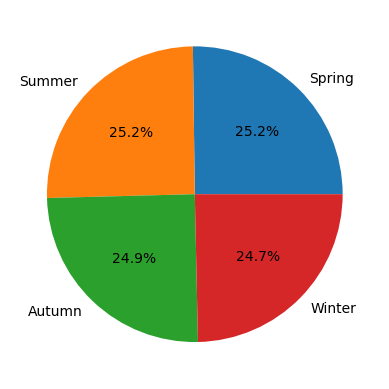

In [140]:
plt.pie(Seasons,labels=Seasons.index,autopct="%1.1f%%")

<Axes: ylabel='count'>

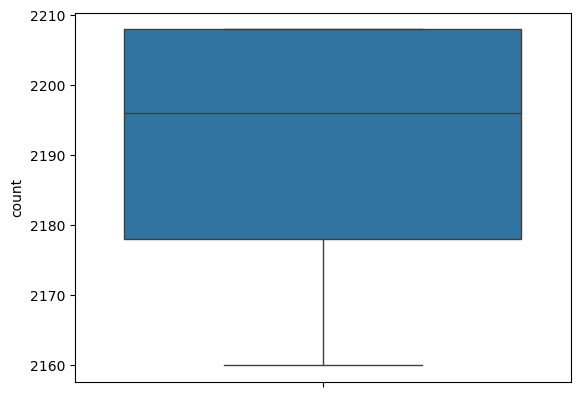

In [142]:
sns.boxplot(Seasons)

In [144]:
df['Holiday'].value_counts()

Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64

In [146]:
week_day=df['Week_Day'].value_counts()

In [148]:
week_day

Week_Day
Sunday       1296
Wednesday    1272
Tuesday      1272
Thursday     1248
Saturday     1248
Friday       1224
Monday       1200
Name: count, dtype: int64

<Axes: ylabel='Week_Day'>

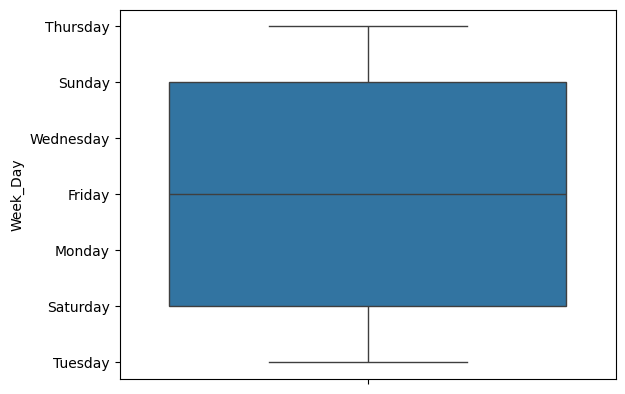

In [150]:
sns.boxplot(df.Week_Day)

([<matplotlib.patches.Wedge at 0x1d529669c70>,
 [Text(0.9833104486459999, 0.4930522909221724, 'Sunday'),
  Text(0.2023981423095214, 1.0812192155107376, 'Wednesday'),
  Text(-0.7313409890826628, 0.8216692507862228, 'Tuesday'),
  Text(-1.098004082677642, -0.06623469199166085, 'Thursday'),
  Text(-0.6350206963008755, -0.8981919144979827, 'Saturday'),
  Text(0.29459584020685864, -1.0598175743649543, 'Friday'),
  Text(0.9996994455114376, -0.45891286606950144, 'Monday')],
 [Text(0.536351153806909, 0.2689376132302758, '14.8%'),
  Text(0.1103989867142844, 0.5897559357331296, '14.5%'),
  Text(-0.39891326677236144, 0.448183227701576, '14.5%'),
  Text(-0.5989113178241683, -0.03612801381363319, '14.2%'),
  Text(-0.34637492525502295, -0.4899228624534451, '14.2%'),
  Text(0.160688640112832, -0.578082313289975, '14.0%'),
  Text(0.5452906066426023, -0.25031610876518257, '13.7%')])

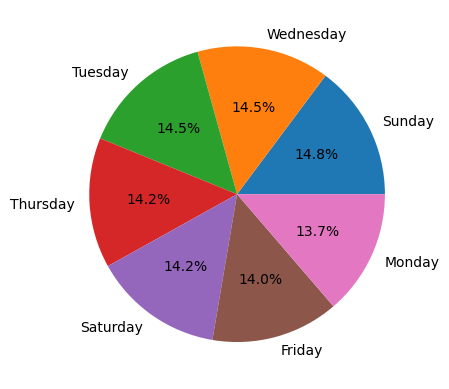

In [152]:
plt.pie(week_day,labels=week_day.index,autopct="%1.1f%%")

<Axes: xlabel='Week_Day', ylabel='count'>

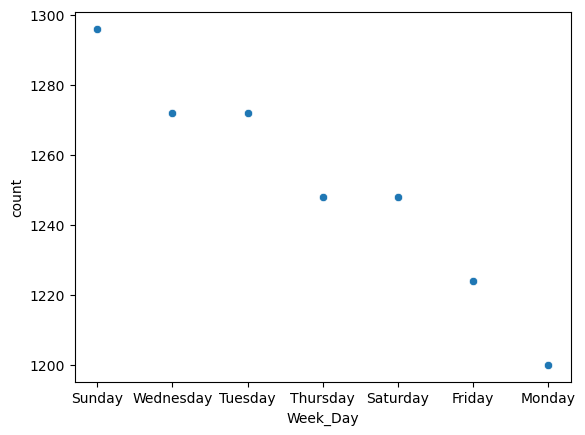

In [154]:
sns.scatterplot(week_day)

In [156]:
##sns.pairplot(df)


C:\Users\jarup\AppData\Local\Temp\ipykernel_8928\3616599090.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Month'],y=df['Rented Bike Count'],palette='rainbow')


<Axes: xlabel='Month', ylabel='Rented Bike Count'>

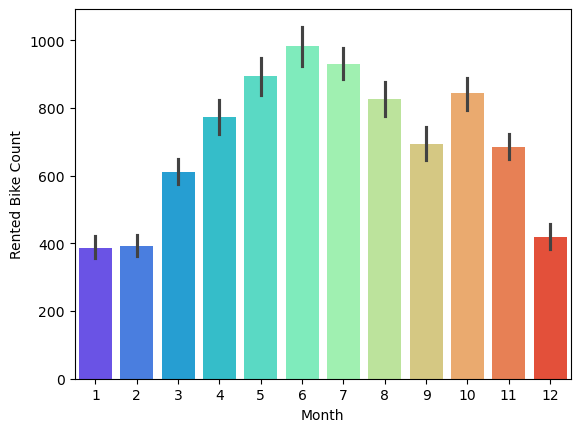

In [158]:
sns.barplot(x=df['Month'],y=df['Rented Bike Count'],palette='rainbow')

C:\Users\jarup\AppData\Local\Temp\ipykernel_8928\2173556383.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Day'],y=df['Rented Bike Count'],palette='viridis')


<Axes: xlabel='Day', ylabel='Rented Bike Count'>

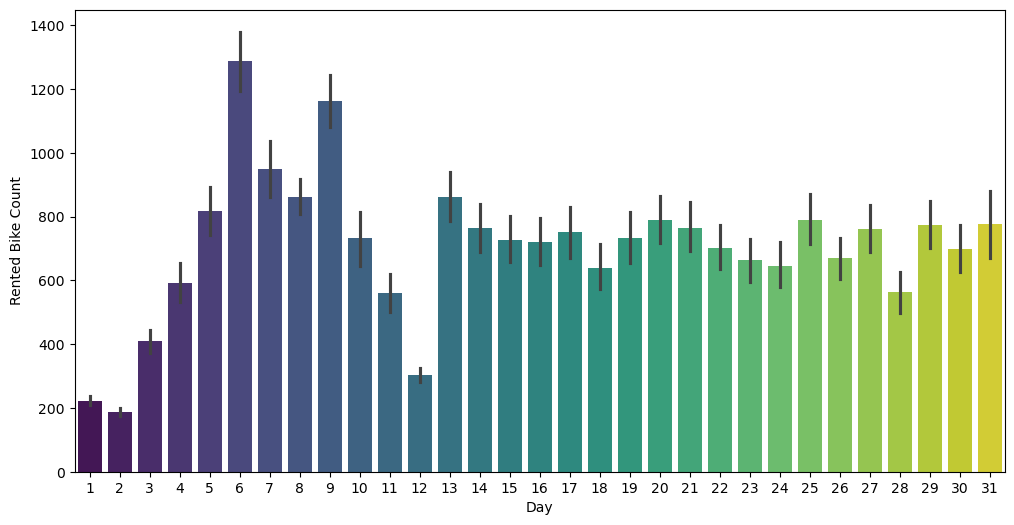

In [160]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['Day'],y=df['Rented Bike Count'],palette='viridis')

<Axes: xlabel='Week_Day', ylabel='Rented Bike Count'>

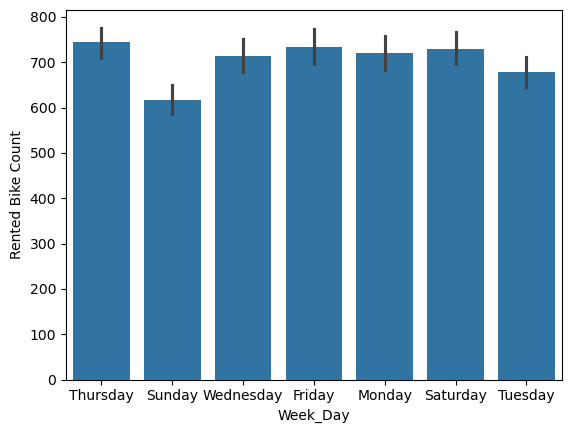

In [162]:
sns.barplot(x=df['Week_Day'],y=df['Rented Bike Count'])

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

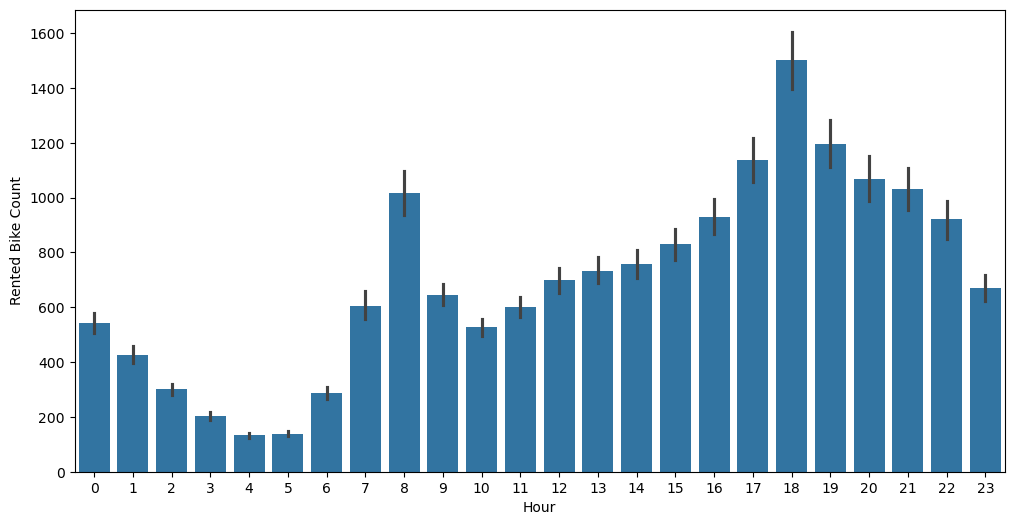

In [164]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['Hour'],y=df['Rented Bike Count'])

<Axes: xlabel='Holiday', ylabel='Rented Bike Count'>

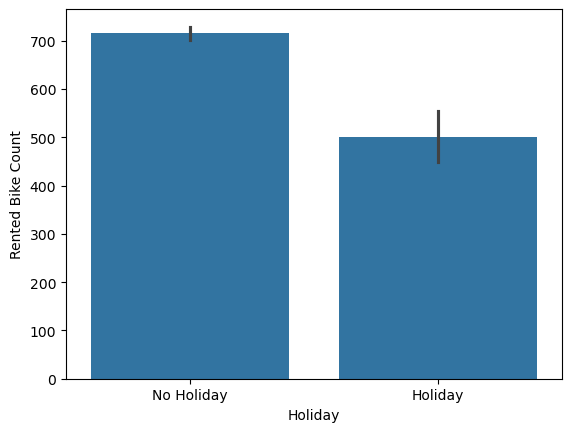

In [166]:
sns.barplot(x=df['Holiday'],y=df['Rented Bike Count'])

In [168]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Day', 'Week_Day', 'Month', 'Year'],
      dtype='object')

<Axes: xlabel='Seasons', ylabel='Rented Bike Count'>

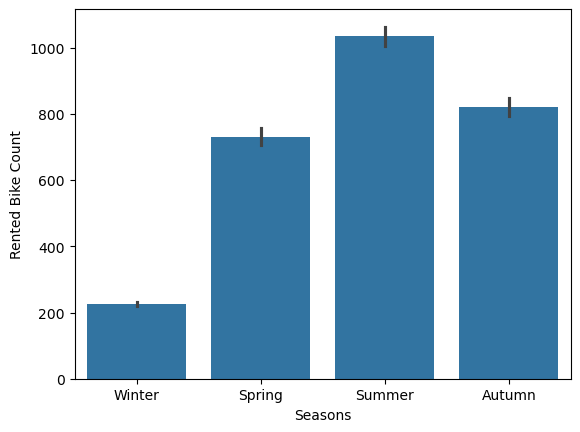

In [170]:
sns.barplot(x=df['Seasons'],y=df['Rented Bike Count'])

In [124]:
#skewness

In [172]:
df.skew(numeric_only=True).sort_values(ascending=False)

Rainfall(mm)                 14.533232
Snowfall (cm)                 8.440801
Solar Radiation (MJ/m2)       1.504040
Rented Bike Count             1.153428
Wind speed (m/s)              0.890955
Humidity(%)                   0.059579
Day                           0.007522
Hour                          0.000000
Month                        -0.010458
Temperature(°C)              -0.198326
Dew point temperature(°C)    -0.367298
Visibility (10m)             -0.701786
Year                         -2.978262
dtype: float64

In [128]:
#REMOVING MULTICOLLINEAROITY

<Axes: >

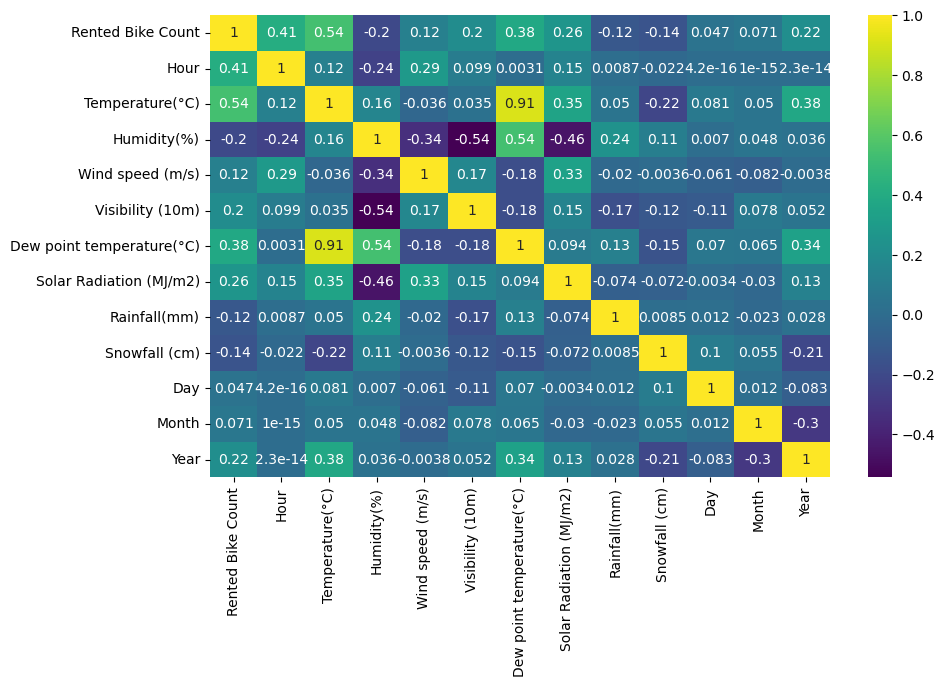

In [174]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='viridis')

In [176]:
df.drop(['Dew point temperature(°C)'],axis=1,inplace=True)

In [178]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Week_Day,Month,Year
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Thursday,1,2017
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Thursday,1,2017
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Thursday,1,2017
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Thursday,1,2017
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Thursday,1,2017


<Axes: ylabel='count'>

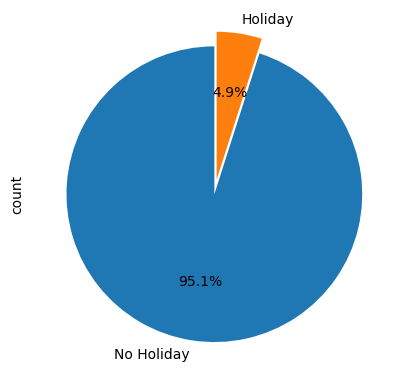

In [180]:
df['Holiday'].value_counts().plot.pie(autopct='%1.1f%%',explode=(0,0.1),startangle=90)

<Axes: ylabel='count'>

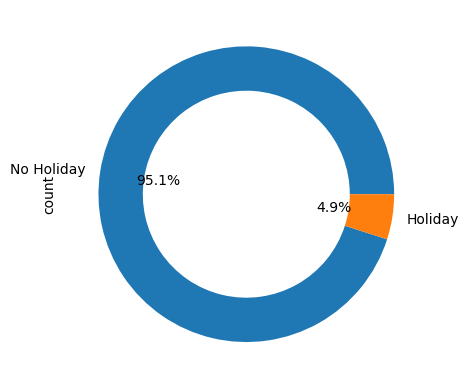

In [182]:
df['Holiday'].value_counts().plot.pie(autopct='%1.1f%%',wedgeprops=dict(width=0.3))

In [184]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday',
       'Functioning Day', 'Day', 'Week_Day', 'Month', 'Year'],
      dtype='object')

In [186]:
num_cols=['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday',
       'Functioning Day', 'Day', 'Week_Day', 'Month', 'Year']

Text(0.5, 1.0, 'violinplot of Rented Bike per hour')

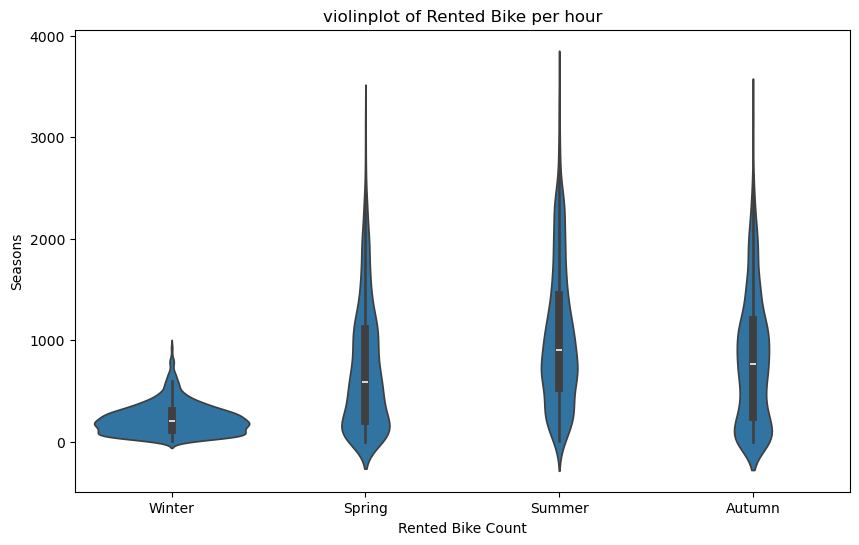

In [188]:
plt.figure(figsize=(10,6))
sns.violinplot(y='Rented Bike Count',x='Seasons',data=df)
plt.xlabel('Rented Bike Count')
plt.ylabel('Seasons')
plt.title("violinplot of Rented Bike per hour")

Text(0.5, 1.0, 'violinplot of Rented Bike per hour')

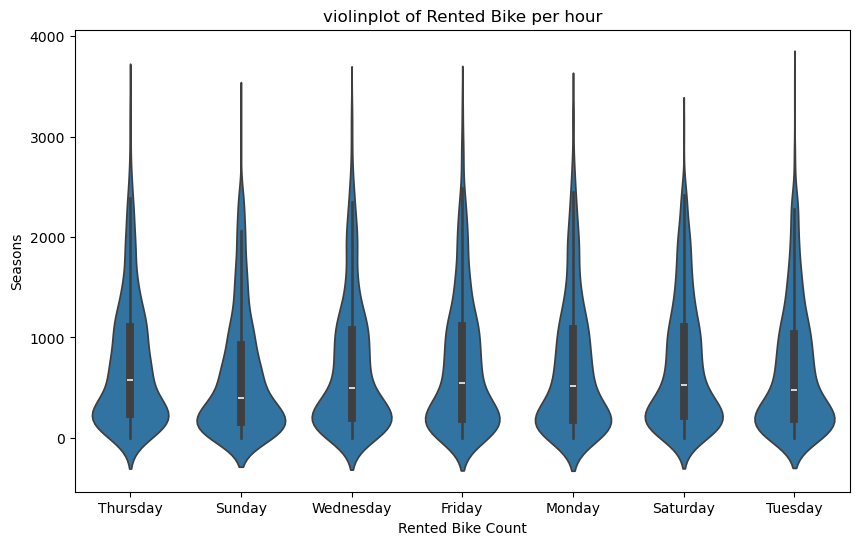

In [190]:
plt.figure(figsize=(10,6))
sns.violinplot(y='Rented Bike Count',x='Week_Day',data=df)
plt.xlabel('Rented Bike Count')
plt.ylabel('Seasons')
plt.title("violinplot of Rented Bike per hour")

In [192]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday',
       'Functioning Day', 'Day', 'Week_Day', 'Month', 'Year'],
      dtype='object')

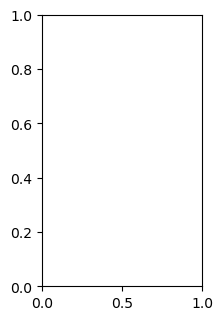

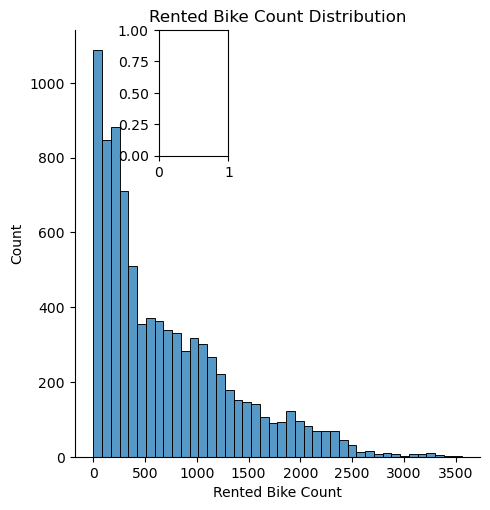

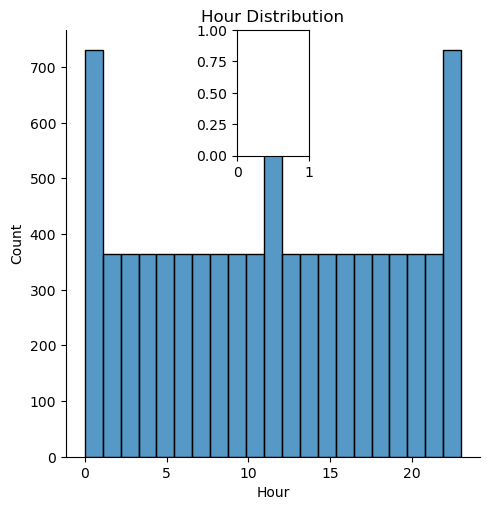

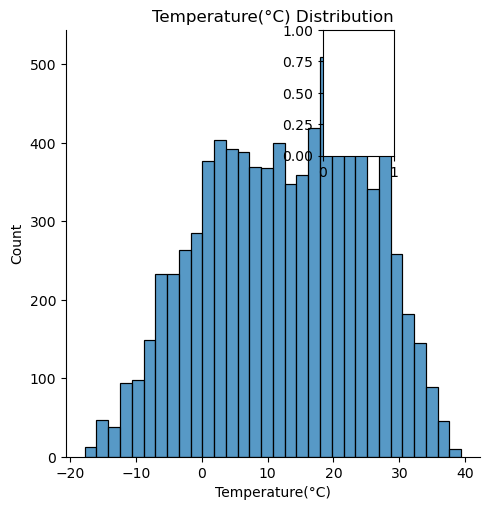

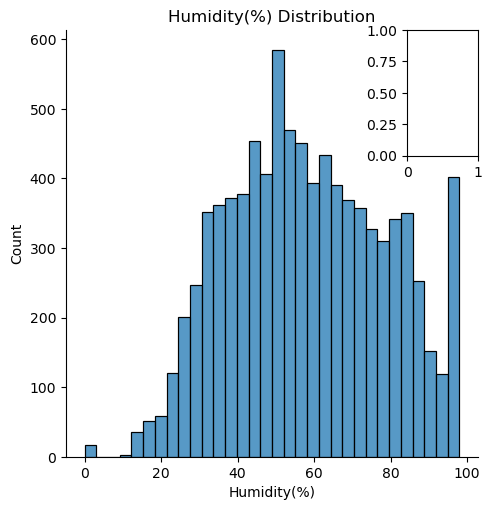

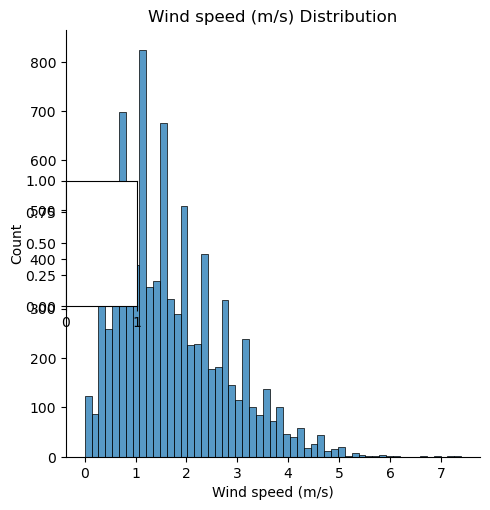

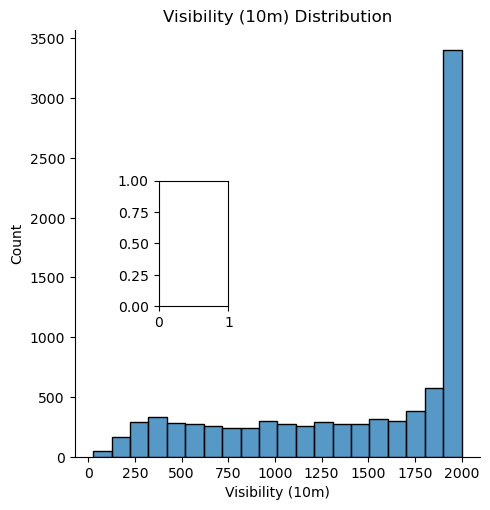

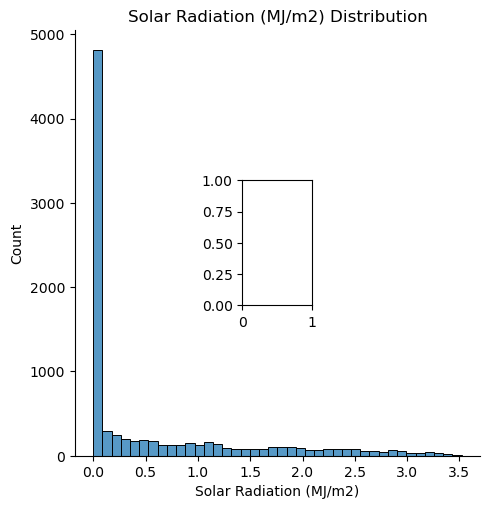

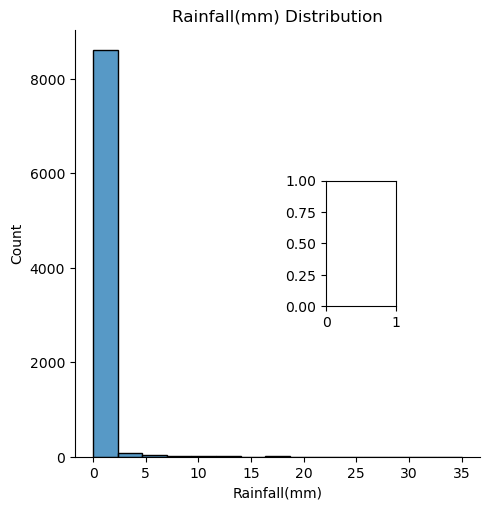

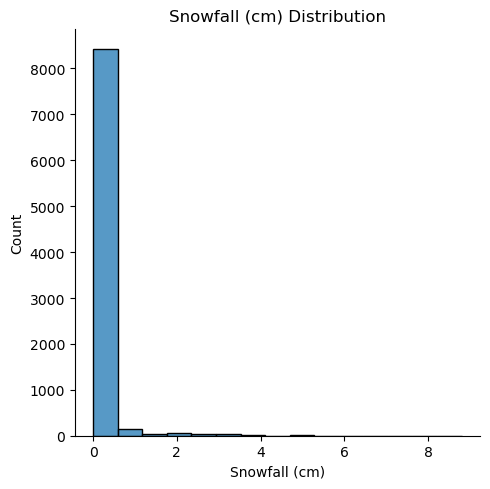

In [194]:
nums_cols = ['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
             'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
             'Rainfall(mm)', 'Snowfall (cm)']
plt.figure(figsize=(12, 12)) 
rows, cols = 3, 5
plot_number = 1
for col in nums_cols[:15]:
    ax = plt.subplot(rows, cols, plot_number)
    sns.displot(df[col])  
    plt.xlabel(col) 
    plt.title(f"{col} Distribution")
    plot_number += 1
plt.tight_layout()

plt.show()

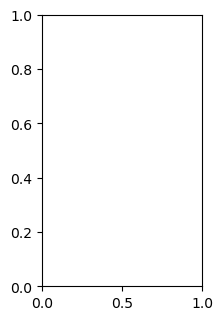

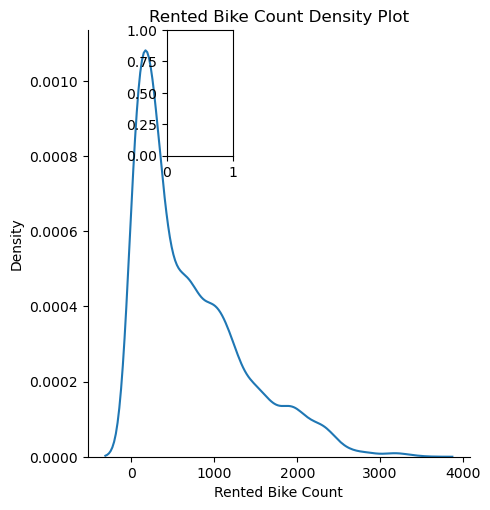

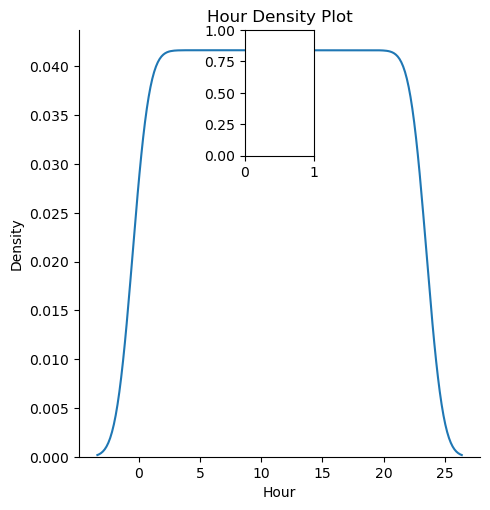

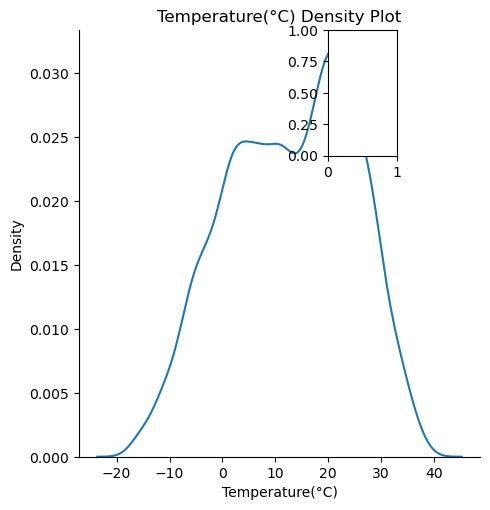

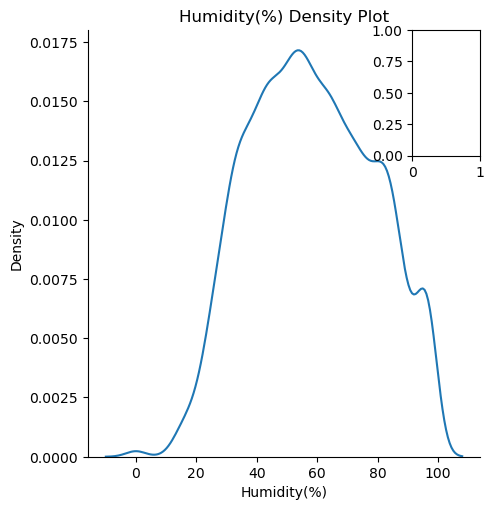

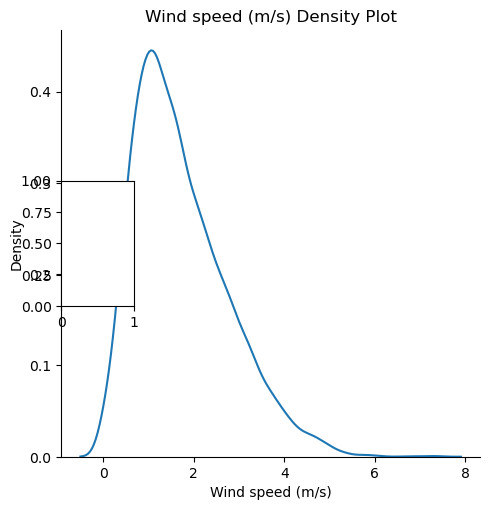

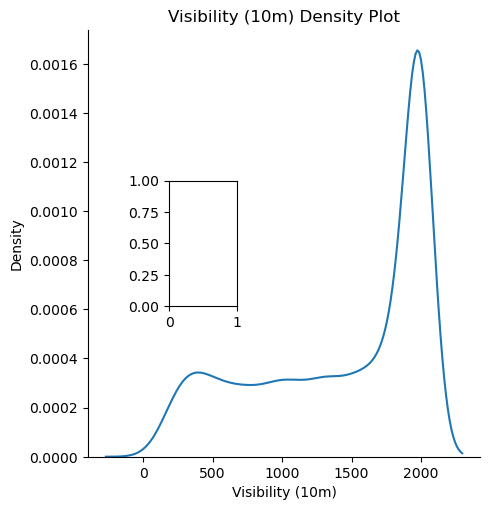

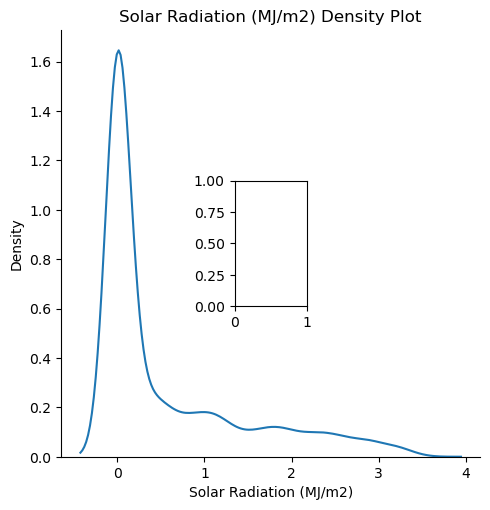

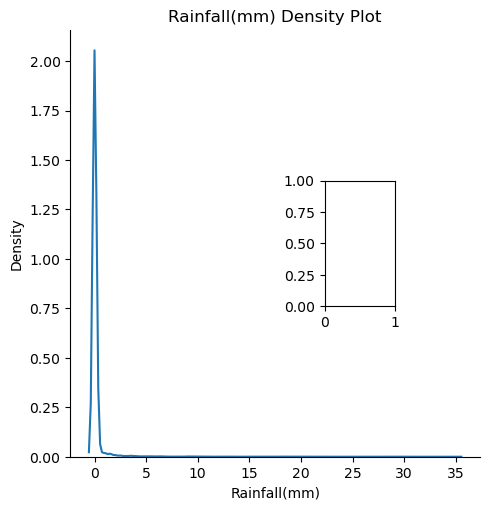

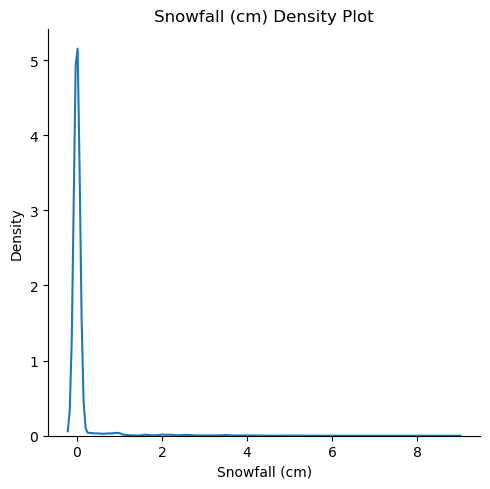

In [229]:

plt.figure(figsize=(12, 12))
rows, cols = 3, 5
plot_number = 1

for col in nums_cols[:15]: 
    ax = plt.subplot(rows, cols, plot_number)
    sns.displot(df[col], kind='kde')  
    plt.xlabel(col) 
    plt.title(f"{col} Density Plot")  
    plot_number += 1
plt.tight_layout()

plt.show()

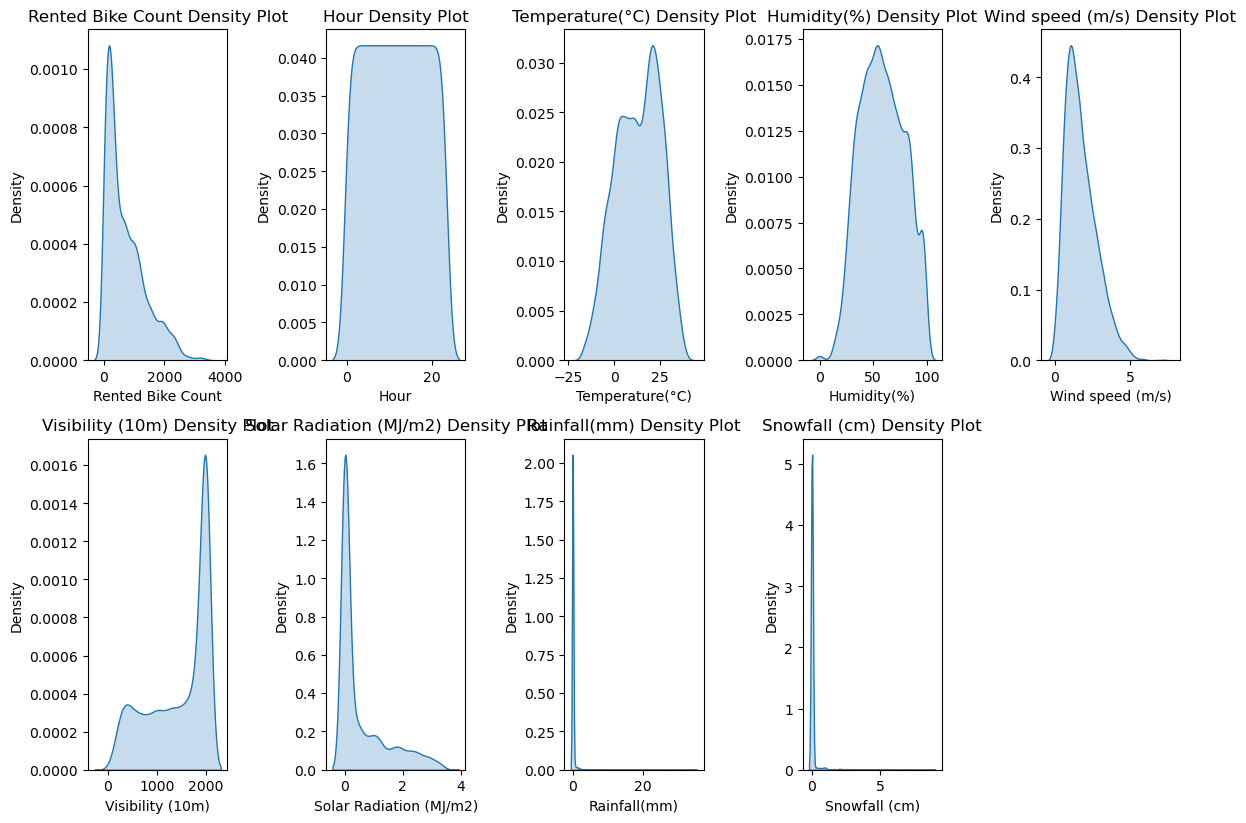

In [196]:

plt.figure(figsize=(12, 12)) 
rows, cols = 3, 5
plot_number = 1
for col in nums_cols[:15]:
    ax = plt.subplot(rows, cols, plot_number)
    sns.kdeplot(df[col], fill=True)
    plt.xlabel(col) 
    plt.title(f"{col} Density Plot")  

    plot_number += 1
plt.tight_layout()

plt.show()

In [198]:
df['Seasons']=df['Seasons'].map({'Winter':0, 'Spring':1,'Summer':2,'Autumn':3})
df['Holiday']=df['Holiday'].map({'No Holiday':0,'Holiday':1})
df['Functioning Day']=df['Functioning Day'].map({'Yes':1,'No':0})
df['Week_Day']=df['Week_Day'].map({'Thursday':4, 'Sunday':7, 'Wednesday':3, 'Friday':5, 'Monday':1, 'Saturday':6,'Tuesday':2})

In [200]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Week_Day,Month,Year
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,1,12,4,1,2017
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,0,1,12,4,1,2017
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,0,1,12,4,1,2017
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1,12,4,1,2017
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,1,12,4,1,2017


In [202]:
# Move the 'Rented Bike Count' column to the last
rented_bike_count = df.pop('Rented Bike Count')  # Remove 'Rented Bike Count'
df['Rented Bike Count'] = rented_bike_count      # Add it back at the end
df.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Week_Day,Month,Year,Rented Bike Count
0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,1,12,4,1,2017,254
1,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,0,1,12,4,1,2017,204
2,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,0,1,12,4,1,2017,173
3,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1,12,4,1,2017,107
4,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,1,12,4,1,2017,78


In [204]:
x=df.iloc[:,:-1]
y=df['Rented Bike Count']

In [206]:
!pip install scikit-learn

In [208]:
import sklearn as sklearn

In [218]:
from sklearn.model_selection import train_test_split

In [220]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.20)

In [222]:
x_train

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Week_Day,Month,Year
8415,15,13.2,61,3.9,719,1.03,0.0,0.0,3,0,1,16,5,11,2018
5049,9,22.9,86,1.7,538,0.76,0.0,0.0,2,0,1,29,5,6,2018
8395,19,11.2,46,1.4,869,0.00,0.0,0.0,3,0,1,15,4,11,2018
1535,23,-2.6,69,2.0,1434,0.00,0.0,0.0,0,0,1,2,5,2,2018
5518,22,27.2,73,1.5,1005,0.00,0.0,0.0,2,0,1,18,3,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,22,29.9,74,2.0,1201,0.00,0.0,0.0,2,0,1,27,5,7,2018
5191,7,23.5,90,0.5,445,0.05,0.5,0.0,2,0,1,7,1,5,2018
5390,14,29.5,62,2.7,1941,1.79,0.0,0.0,2,0,1,13,5,7,2018
860,20,-3.4,51,1.1,1391,0.00,0.0,0.0,0,0,1,1,2,5,2018


In [224]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [226]:
x_train=ss.fit_transform(x_train)

In [228]:
x_test=ss.transform(x_test)

In [230]:
x_train

array([[ 0.50542093,  0.02237011,  0.13701177, ...,  0.48085524,
         1.30146485,  0.30179287],
       [-0.36356579,  0.83822207,  1.35998213, ...,  0.48085524,
        -0.14948419,  0.30179287],
       [ 1.08474541, -0.14584679, -0.59677044, ..., -0.01882351,
         1.30146485,  0.30179287],
       ...,
       [ 0.36058981,  1.39333784,  0.18593058, ...,  0.48085524,
         0.14070562,  0.30179287],
       [ 1.22957653, -1.37383015, -0.35217637, ..., -1.01818103,
        -0.439674  ,  0.30179287],
       [ 1.51923877,  0.53543165, -0.15650112, ...,  0.980534  ,
         0.72108523,  0.30179287]])

In [232]:
x_test

array([[-0.50839691,  1.1998884 ,  0.52836228, ..., -1.51785979,
         1.01127504,  0.30179287],
       [ 0.07092757,  1.65407403, -0.35217637, ...,  0.48085524,
         0.14070562,  0.30179287],
       [ 0.36058981,  1.77182586, -0.40109519, ...,  1.48021276,
         0.14070562,  0.30179287],
       ...,
       [-0.94289027,  0.64477264,  0.33268703, ...,  0.48085524,
        -1.31024342,  0.30179287],
       [-0.65322803, -1.69344226,  0.5772811 , ..., -1.01818103,
        -1.31024342,  0.30179287],
       [ 0.21575869,  1.80546924, -0.49893282, ..., -0.51850227,
         0.43089543,  0.30179287]])

In [234]:
ss.mean_

array([1.15102740e+01, 1.29340325e+01, 5.81992009e+01, 1.73076484e+00,
       1.43683390e+03, 5.75927511e-01, 1.43007991e-01, 7.72117580e-02,
       1.50642123e+00, 5.02283105e-02, 9.66181507e-01, 1.57267409e+01,
       4.03767123e+00, 6.51512557e+00, 2.01791652e+03])

In [236]:
ss.scale_

array([6.90459343e+00, 1.18894119e+01, 2.04420327e+01, 1.03645365e+00,
       6.10344426e+02, 8.73718874e-01, 1.06707131e+00, 4.51461149e-01,
       1.11289858e+00, 2.18415721e-01, 1.80761729e-01, 8.79883396e+00,
       2.00128579e+00, 3.44602040e+00, 2.76600398e-01])

In [239]:
!pip install xgboost

                    Model                             Best Params  \
0       Linear Regression                                      {}   
1           Random Forest  {'max_depth': 10, 'n_estimators': 100}   
2  Support Vector Machine              {'C': 1, 'gamma': 'scale'}   
3                 XGBoost   {'max_depth': 5, 'n_estimators': 200}   

             MSE        RMSE         MAE       R^2  
0  196690.484704  443.498010  332.269764  0.527920  
1   53151.678365  230.546478  141.743004  0.872430  
2  289487.315919  538.040255  358.693400  0.305196  
3   35218.267677  187.665308  115.735532  0.915472  


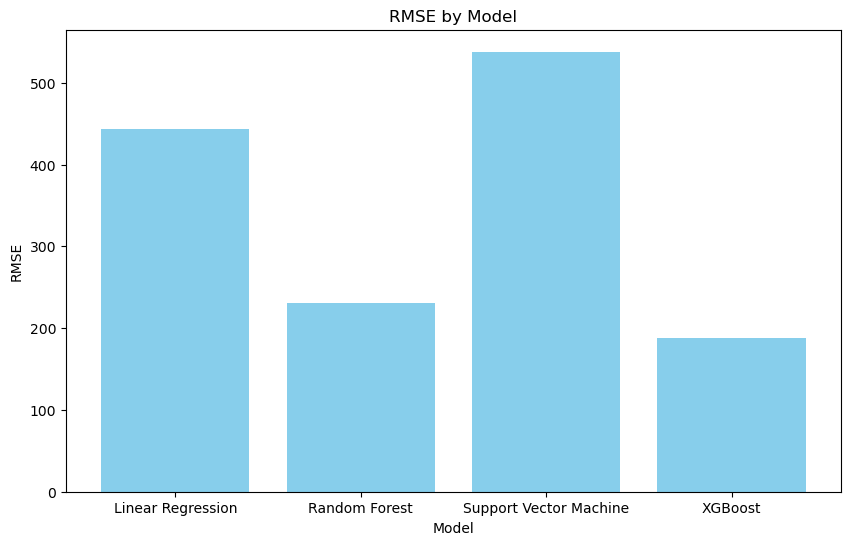

In [241]:
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Define regression models and their grid search parameters
regressors = {
    "Linear Regression": (LinearRegression(), {}),
    "Random Forest": (RandomForestRegressor(), {"n_estimators": [100, 200], "max_depth": [5, 10]}),
    "Support Vector Machine": (SVR(), {"C": [0.1, 1], "gamma": ["scale", "auto"]}),
    "XGBoost": (XGBRegressor(objective="reg:squarederror"), {"n_estimators": [100, 200], "max_depth": [5, 10]})
}

output_df = []

# Iterate through each regressor and evaluate its performance
for name, (model, param_grid) in regressors.items():
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring="neg_mean_squared_error")
    grid_search.fit(x_train, y_train)
    
    # Get the best model and evaluate it
    best_model = grid_search.best_estimator_
    
    # Predictions and evaluation metrics
    y_pred = best_model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Append results to the output DataFrame
    output_df.append({
        "Model": name,
        "Best Params": grid_search.best_params_,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "R^2": r2
    })

output_df = pd.DataFrame(output_df)

# Display the results
print(output_df)

# Create a bar plot for visualization
plt.figure(figsize=(10, 6))
plt.bar(output_df["Model"], output_df["RMSE"], color="skyblue")
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.title("RMSE by Model")
plt.show()

<BarContainer object of 4 artists>

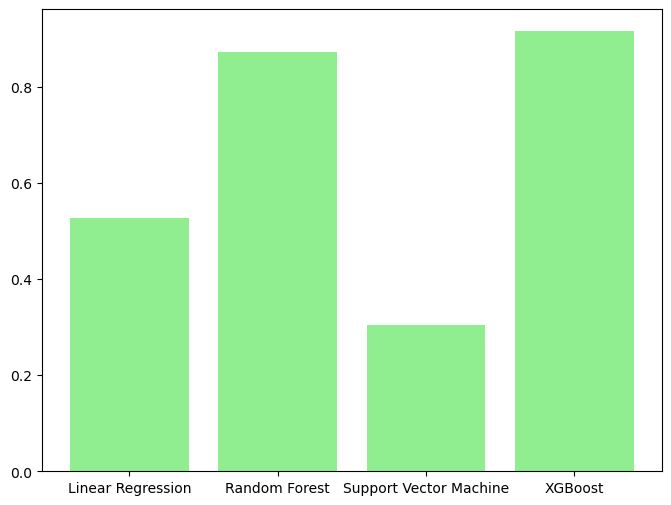

In [242]:
plt.figure(figsize=(8,6))
plt.bar(output_df["Model"], output_df["R^2"],color='lightgreen')

In [243]:
output_df

,Model,Best Params,MSE,RMSE,MAE,R^2
0,Linear Regression,{},196690.484704,443.498010,332.269764,0.527920
1,Random Forest,"{'max_depth': 10, 'n_estimators': 100}",53151.678365,230.546478,141.743004,0.872430
2,Support Vector Machine,"{'C': 1, 'gamma': 'scale'}",289487.315919,538.040255,358.693400,0.305196
3,XGBoost,"{'max_depth': 5, 'n_estimators': 200}",35218.267677,187.665308,115.735532,0.915472


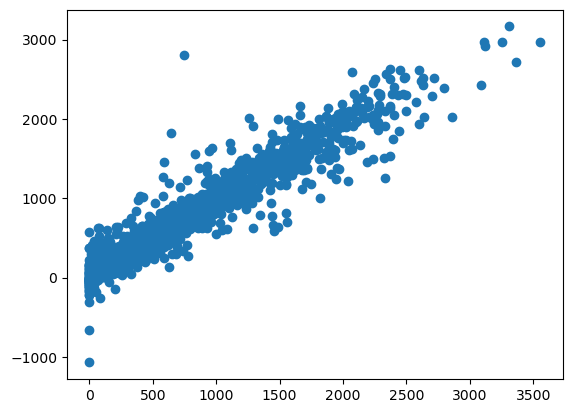

In [244]:
plt.scatter(y_test,y_pred)

In [249]:
import pickle
import os
dir=r'E:\Models'
model_file_name='Xgboost_Regressor_r2_0.915_v1.pkl'

model_file_path=os.path.join(dir,model_file_name)
model_file_path

'E:\\Models\\Xgboost_Regressor_r2_0.915_v1.pkl'

In [257]:
#pickle.dump(best_model,open(model_file_path,'wb'))

In [253]:
x_test[0]

array([-0.50839691,  1.1998884 ,  0.52836228,  0.06680005,  0.9210637 ,
        0.14200505, -0.13401915, -0.17102636,  0.44350741, -0.22996655,
        0.18708879, -0.87815509, -1.51785979,  1.01127504,  0.30179287])

In [255]:
x_test[1]

array([ 0.07092757,  1.65407403, -0.35217637,  0.3562486 , -1.04340087,
        3.01478263, -0.13401915, -0.17102636,  0.44350741, -0.22996655,
        0.18708879,  0.48566198,  0.48085524,  0.14070562,  0.30179287])